In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv(r"D:\Ravin\ICBT\Bsc\CIS6005 ML\###Assignment###\Competition\train.csv")

In [4]:
#type(df)

In [5]:
#print(df.dtypes)

In [6]:
#df.shape

In [7]:
# Summary statistics for numerical columns
#df.describe()

In [8]:
#df.head()

In [9]:
#df.tail()

In [10]:
'''import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()'''

'import seaborn as sns\nimport matplotlib.pyplot as plt\n\nplt.figure(figsize=(12, 8))\nsns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")\nplt.title("Correlation Heatmap")\nplt.show()'

In [11]:
'''# Churn distribution


sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()'''

'# Churn distribution\n\n\nsns.countplot(data=df, x=\'Churn\')\nplt.title("Churn Distribution")\nplt.show()'

In [12]:
'''# Gender vs Churn
sns.countplot(data=df, x='Gender', hue='Churn')
plt.title("Gender vs Churn")
plt.show()'''

'# Gender vs Churn\nsns.countplot(data=df, x=\'Gender\', hue=\'Churn\')\nplt.title("Gender vs Churn")\nplt.show()'

In [13]:
'''# Location vs Churn
sns.countplot(data=df, x='Location', hue='Churn')
plt.title("Location vs Churn")
plt.show()'''

'# Location vs Churn\nsns.countplot(data=df, x=\'Location\', hue=\'Churn\')\nplt.title("Location vs Churn")\nplt.show()'

In [14]:
'''# Subscription Type vs Churn
sns.countplot(data=df, x='Subscription_Type', hue='Churn')
plt.title("Subscription Type vs Churn")
plt.show()'''

'# Subscription Type vs Churn\nsns.countplot(data=df, x=\'Subscription_Type\', hue=\'Churn\')\nplt.title("Subscription Type vs Churn")\nplt.show()'

In [15]:
'''# Last Interaction Type vs Churn
sns.countplot(data=df, x='Last_Interaction_Type', hue='Churn')
plt.title("Last Interaction Type vs Churn")
plt.show()'''

'# Last Interaction Type vs Churn\nsns.countplot(data=df, x=\'Last_Interaction_Type\', hue=\'Churn\')\nplt.title("Last Interaction Type vs Churn")\nplt.show()'

In [16]:
'''# Histograms for numeric columns
numeric_cols = ['Age', 'Monthly_Spending', 'Account_Age_Months', 'Total_Usage_Hours', 'Support_Calls', 'Late_Payments', 
                'Streaming_Usage', 'Discount_Used', 'Satisfaction_Score', 'Complaint_Tickets', 'Promo_Opted_In', 'Churn']

df[numeric_cols].hist(bins=20, figsize=(20, 20), edgecolor='black', color='grey')
plt.suptitle("Distribution of Numeric Features")
plt.show()'''

'# Histograms for numeric columns\nnumeric_cols = [\'Age\', \'Monthly_Spending\', \'Account_Age_Months\', \'Total_Usage_Hours\', \'Support_Calls\', \'Late_Payments\', \n                \'Streaming_Usage\', \'Discount_Used\', \'Satisfaction_Score\', \'Complaint_Tickets\', \'Promo_Opted_In\', \'Churn\']\n\ndf[numeric_cols].hist(bins=20, figsize=(20, 20), edgecolor=\'black\', color=\'grey\')\nplt.suptitle("Distribution of Numeric Features")\nplt.show()'

In [17]:
#df.isnull().sum()*100/df.shape[0]

In [18]:
'''from scipy.stats import pointbiserialr, chi2_contingency

# Identify target variable
target = 'Churn'

# Separate numerical and categorical features (excluding ID and target)
numerical_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer_ID', target]).columns
categorical_features = df.select_dtypes(include=['object']).columns

# 1. Point-biserial correlation for numerical features
num_pvals = {}
for col in numerical_features:
    _, pval = pointbiserialr(df[col], df[target])
    num_pvals[col] = pval

# 2. Chi-square test for categorical features
cat_pvals = {}
for col in categorical_features:
    contingency = pd.crosstab(df[col], df[target])
    _, pval, _, _ = chi2_contingency(contingency)
    cat_pvals[col] = pval

# Combine and sort
pval_df = pd.DataFrame({
    'Feature': list(num_pvals.keys()) + list(cat_pvals.keys()),
    'P-Value': list(num_pvals.values()) + list(cat_pvals.values()),
    'Type': ['Numerical'] * len(num_pvals) + ['Categorical'] * len(cat_pvals)
}).sort_values(by='P-Value')

# Display results
pval_df.reset_index(drop=True, inplace=True)
pval_df'''

"from scipy.stats import pointbiserialr, chi2_contingency\n\n# Identify target variable\ntarget = 'Churn'\n\n# Separate numerical and categorical features (excluding ID and target)\nnumerical_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer_ID', target]).columns\ncategorical_features = df.select_dtypes(include=['object']).columns\n\n# 1. Point-biserial correlation for numerical features\nnum_pvals = {}\nfor col in numerical_features:\n    _, pval = pointbiserialr(df[col], df[target])\n    num_pvals[col] = pval\n\n# 2. Chi-square test for categorical features\ncat_pvals = {}\nfor col in categorical_features:\n    contingency = pd.crosstab(df[col], df[target])\n    _, pval, _, _ = chi2_contingency(contingency)\n    cat_pvals[col] = pval\n\n# Combine and sort\npval_df = pd.DataFrame({\n    'Feature': list(num_pvals.keys()) + list(cat_pvals.keys()),\n    'P-Value': list(num_pvals.values()) + list(cat_pvals.values()),\n    'Type': ['Numerical'] * len(num_pva

In [19]:
'''import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features
target = 'Churn'
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer_ID', target]).columns
categorical_cols = df.select_dtypes(include='object').columns

# Calculate p-values for numerical features
numerical_pvals = {}
for col in numerical_cols:
    group0 = df[df[target] == 0][col]
    group1 = df[df[target] == 1][col]
    _, pval = stats.ttest_ind(group0, group1, equal_var=False)
    numerical_pvals[col] = pval

# Calculate p-values for categorical features
categorical_pvals = {}
for col in categorical_cols:
    contingency = pd.crosstab(df[col], df[target])
    _, pval, _, _ = stats.chi2_contingency(contingency)
    categorical_pvals[col] = pval

# Combine all p-values
pvals = {**numerical_pvals, **categorical_pvals}
pvals_df = pd.DataFrame.from_dict(pvals, orient='index', columns=['p_value'])
pvals_df['Feature'] = pvals_df.index
pvals_df = pvals_df.sort_values(by='p_value', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=pvals_df, x='p_value', y='Feature', palette='coolwarm', hue=(pvals_df['p_value'] < 0.05))
plt.axvline(0.05, color='red', linestyle='--', label='p = 0.05')
plt.title("Feature Importance Based on P-Value (Statistical Significance)")
plt.xlabel("P-Value")
plt.ylabel("Feature")
plt.legend(title='Significant (p < 0.05)', loc='upper right')
plt.tight_layout()
plt.show()'''

'import pandas as pd\nfrom scipy import stats\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Separate features\ntarget = \'Churn\'\nnumerical_cols = df.select_dtypes(include=[\'int64\', \'float64\']).drop(columns=[\'Customer_ID\', target]).columns\ncategorical_cols = df.select_dtypes(include=\'object\').columns\n\n# Calculate p-values for numerical features\nnumerical_pvals = {}\nfor col in numerical_cols:\n    group0 = df[df[target] == 0][col]\n    group1 = df[df[target] == 1][col]\n    _, pval = stats.ttest_ind(group0, group1, equal_var=False)\n    numerical_pvals[col] = pval\n\n# Calculate p-values for categorical features\ncategorical_pvals = {}\nfor col in categorical_cols:\n    contingency = pd.crosstab(df[col], df[target])\n    _, pval, _, _ = stats.chi2_contingency(contingency)\n    categorical_pvals[col] = pval\n\n# Combine all p-values\npvals = {**numerical_pvals, **categorical_pvals}\npvals_df = pd.DataFrame.from_dict(pvals, orient=\'index\', columns=[\'p_value

In [20]:
'''import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns (excluding ID and target)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer_ID', 'Churn']).columns

# Plot each numeric column separately
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='grey')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()'''

"import pandas as pd\nimport seaborn as sns\nimport matplotlib.pyplot as plt\n\n# List of numeric columns (excluding ID and target)\nnumeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer_ID', 'Churn']).columns\n\n# Plot each numeric column separately\nfor col in numeric_cols:\n    plt.figure(figsize=(6, 4))\n    sns.boxplot(y=df[col], color='grey')\n    plt.title(f'Boxplot of {col}')\n    plt.ylabel(col)\n    plt.grid(True)\n    plt.tight_layout()\n    plt.show()"

In [21]:
'''# Function to detect outliers using IQR
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = series[(series < lower) | (series > upper)]
    return len(outliers), outliers.tolist()

# List of numeric columns (excluding ID and target)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer_ID', 'Churn']).columns

# Create outlier summary table
summary_data = []

for col in numeric_cols:
    count, values = count_outliers_iqr(df[col])
    percentage = round((count / len(df)) * 100, 2)
    summary_data.append({
        'Feature': col,
        'Outlier Count': count,
        'Outlier %': percentage,
        'Outlier Sample': values[:5]  # Show first 5 outlier values
    })

outlier_summary_df = pd.DataFrame(summary_data)
print(outlier_summary_df)'''

"# Function to detect outliers using IQR\ndef count_outliers_iqr(series):\n    Q1 = series.quantile(0.25)\n    Q3 = series.quantile(0.75)\n    IQR = Q3 - Q1\n    lower = Q1 - 1.5 * IQR\n    upper = Q3 + 1.5 * IQR\n    outliers = series[(series < lower) | (series > upper)]\n    return len(outliers), outliers.tolist()\n\n# List of numeric columns (excluding ID and target)\nnumeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Customer_ID', 'Churn']).columns\n\n# Create outlier summary table\nsummary_data = []\n\nfor col in numeric_cols:\n    count, values = count_outliers_iqr(df[col])\n    percentage = round((count / len(df)) * 100, 2)\n    summary_data.append({\n        'Feature': col,\n        'Outlier Count': count,\n        'Outlier %': percentage,\n        'Outlier Sample': values[:5]  # Show first 5 outlier values\n    })\n\noutlier_summary_df = pd.DataFrame(summary_data)\nprint(outlier_summary_df)"

In [22]:
#Encode categorical features
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Location'] = df['Location'].map({"Illinois": 0, "California": 1, "Florida": 2, "New York": 3, "Texas": 4})
df['Subscription_Type'] = df['Subscription_Type'].map({"Basic": 0, "Premium": 1, "Enterprise": 2})
df['Last_Interaction_Type'] = df['Last_Interaction_Type'].map({"Negative": 0, "Neutral": 1, "Positive": 2})

In [23]:
#drop non impacting features
features = df.drop(['Customer_ID', 'Churn'], axis=1)
labels = df['Churn']

In [24]:
df.isnull().sum()*100/df.shape[0]

Customer_ID              0.0
Age                      0.0
Gender                   0.0
Location                 0.0
Subscription_Type        0.0
Account_Age_Months       0.0
Monthly_Spending         0.0
Total_Usage_Hours        0.0
Support_Calls            0.0
Late_Payments            0.0
Streaming_Usage          0.0
Discount_Used            0.0
Satisfaction_Score       0.0
Last_Interaction_Type    0.0
Complaint_Tickets        0.0
Promo_Opted_In           0.0
Churn                    0.0
dtype: float64

In [25]:
#Spliting data into tetsing and training

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, 
                                                    labels, 
                                                    test_size=0.1, 
                                                    random_state=4200)

In [26]:
#Check whether imbalanced
df['Churn'].value_counts(normalize=True)

Churn
0    0.686875
1    0.313125
Name: proportion, dtype: float64

In [27]:
!pip install imbalanced-learn

In [28]:
from imblearn.over_sampling import SMOTE

In [29]:
smote = SMOTE(random_state=4200)

In [30]:
x_train_bal, y_train_bal = smote.fit_resample(x_train, y_train)

In [31]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_bal))

Before SMOTE: Counter({0: 4930, 1: 2270})
After SMOTE: Counter({1: 4930, 0: 4930})


In [32]:
'''#Testing using a simple model
from sklearn.naive_bayes import GaussianNB'''

'#Testing using a simple model\nfrom sklearn.naive_bayes import GaussianNB'

In [33]:
'''model = GaussianNB()
model.fit(x_train_bal, y_train_bal)'''

'model = GaussianNB()\nmodel.fit(x_train_bal, y_train_bal)'

In [34]:
'''from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    f1_score)'''

'from sklearn.metrics import (\n    accuracy_score,\n    precision_score,\n    recall_score,\n    confusion_matrix,\n    f1_score)'

In [35]:
'''# Make predictions
predictions = model.predict(x_test)

# Evaluate model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print results
print(f"Accuracy:  {accuracy * 100:.2f}%")
print(f"Precision: {prec * 100:.2f}%")
print(f"Recall:    {rec * 100:.2f}%")
print(f"F1 Score:  {f1 * 100:.2f}%")'''

'# Make predictions\npredictions = model.predict(x_test)\n\n# Evaluate model\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\n\naccuracy = accuracy_score(y_test, predictions)\nprec = precision_score(y_test, predictions)\nrec = recall_score(y_test, predictions)\nf1 = f1_score(y_test, predictions)\n\n# Print results\nprint(f"Accuracy:  {accuracy * 100:.2f}%")\nprint(f"Precision: {prec * 100:.2f}%")\nprint(f"Recall:    {rec * 100:.2f}%")\nprint(f"F1 Score:  {f1 * 100:.2f}%")'

In [36]:
'''cm  = confusion_matrix(y_test, predictions)'''

'cm  = confusion_matrix(y_test, predictions)'

In [37]:
'''import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True,
            xticklabels=['Not_Churn (0)', 'Churn (1)'],
            yticklabels=['Not_Churn (0)', 'Churn (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')'''

"import seaborn as sns\nimport matplotlib.pyplot as plt\nplt.figure(figsize=(6,6))\nsns.heatmap(cm, annot=True,\n            xticklabels=['Not_Churn (0)', 'Churn (1)'],\n            yticklabels=['Not_Churn (0)', 'Churn (1)'])\nplt.xlabel('Predicted')\nplt.ylabel('Actual')"

In [38]:
'''predictions = model.predict(x_train_bal)

accuracy = accuracy_score(y_train_bal, predictions)
prec = precision_score(y_train_bal, predictions)
rec = recall_score(y_train_bal, predictions)
f1 = f1_score(y_train_bal, predictions)

print("Accuracy: ", accuracy * 100)
print("Recall: ", rec * 100)
print("Precision: ", prec * 100)
print("F1: ", f1 * 100)'''

'predictions = model.predict(x_train_bal)\n\naccuracy = accuracy_score(y_train_bal, predictions)\nprec = precision_score(y_train_bal, predictions)\nrec = recall_score(y_train_bal, predictions)\nf1 = f1_score(y_train_bal, predictions)\n\nprint("Accuracy: ", accuracy * 100)\nprint("Recall: ", rec * 100)\nprint("Precision: ", prec * 100)\nprint("F1: ", f1 * 100)'

In [39]:
!pip install xgboost catboost lightgbm

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [41]:
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_xgboost = XGBClassifier()
model_cat = CatBoostClassifier()
model_lgbm = LGBMClassifier()

In [42]:
model_dt.fit(x_train_bal, y_train_bal)
model_rf.fit(x_train_bal, y_train_bal)
model_xgboost.fit(x_train_bal, y_train_bal)
model_cat.fit(x_train_bal, y_train_bal)
model_lgbm.fit(x_train_bal, y_train_bal)

Learning rate set to 0.027373
0:	learn: 0.6904038	total: 148ms	remaining: 2m 27s
1:	learn: 0.6878528	total: 153ms	remaining: 1m 16s
2:	learn: 0.6855938	total: 157ms	remaining: 52.1s
3:	learn: 0.6829767	total: 161ms	remaining: 40.1s
4:	learn: 0.6804594	total: 165ms	remaining: 32.9s
5:	learn: 0.6780735	total: 171ms	remaining: 28.3s
6:	learn: 0.6758825	total: 175ms	remaining: 24.8s
7:	learn: 0.6738166	total: 179ms	remaining: 22.3s
8:	learn: 0.6717156	total: 184ms	remaining: 20.2s
9:	learn: 0.6703314	total: 188ms	remaining: 18.6s
10:	learn: 0.6683206	total: 192ms	remaining: 17.2s
11:	learn: 0.6666362	total: 197ms	remaining: 16.2s
12:	learn: 0.6649150	total: 201ms	remaining: 15.2s
13:	learn: 0.6633711	total: 204ms	remaining: 14.4s
14:	learn: 0.6617959	total: 207ms	remaining: 13.6s
15:	learn: 0.6602703	total: 210ms	remaining: 12.9s
16:	learn: 0.6586987	total: 213ms	remaining: 12.3s
17:	learn: 0.6575335	total: 217ms	remaining: 11.8s
18:	learn: 0.6562941	total: 220ms	remaining: 11.3s
19:	learn

LGBMClassifier()

In [43]:
model_dict = {
    "DT" : DecisionTreeClassifier(),
    "RF" : RandomForestClassifier(),
    "XGB" : XGBClassifier(),
    "CAT" : CatBoostClassifier(),
    "LGBM" : LGBMClassifier()
}

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def calculate_performance(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    return acc, prec, rec, f1, cm

In [45]:
results = []
for model_name, model in model_dict.items():
    model.fit(x_train_bal, y_train_bal)
    predictions = model.predict(x_test)
    acc, prec, rec, f1, cm = calculate_performance(
        y_test, predictions)
    results.append({
        "Model" : model_name,
        "Accuracy" : acc,
        "Precision" : prec,
        "Recall" : rec,
        "F1" : f1
    })

Learning rate set to 0.027373
0:	learn: 0.6904038	total: 4.25ms	remaining: 4.25s
1:	learn: 0.6878528	total: 7.93ms	remaining: 3.96s
2:	learn: 0.6855938	total: 11.5ms	remaining: 3.83s
3:	learn: 0.6829767	total: 15.1ms	remaining: 3.77s
4:	learn: 0.6804594	total: 18.5ms	remaining: 3.67s
5:	learn: 0.6780735	total: 21.7ms	remaining: 3.6s
6:	learn: 0.6758825	total: 25.1ms	remaining: 3.56s
7:	learn: 0.6738166	total: 28.5ms	remaining: 3.53s
8:	learn: 0.6717156	total: 31.8ms	remaining: 3.5s
9:	learn: 0.6703314	total: 34.9ms	remaining: 3.46s
10:	learn: 0.6683206	total: 38.2ms	remaining: 3.43s
11:	learn: 0.6666362	total: 41.7ms	remaining: 3.43s
12:	learn: 0.6649150	total: 45.1ms	remaining: 3.43s
13:	learn: 0.6633711	total: 48.5ms	remaining: 3.42s
14:	learn: 0.6617959	total: 52.2ms	remaining: 3.42s
15:	learn: 0.6602703	total: 55.4ms	remaining: 3.41s
16:	learn: 0.6586987	total: 58.7ms	remaining: 3.39s
17:	learn: 0.6575335	total: 62.2ms	remaining: 3.39s
18:	learn: 0.6562941	total: 65.6ms	remaining: 

In [46]:
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1
0,DT,0.52375,0.284024,0.408511,0.335079
1,RF,0.62000,0.311475,0.242553,0.272727
2,XGB,0.58500,0.303644,0.319149,0.311203
3,CAT,0.61000,0.320930,0.293617,0.306667
4,LGBM,0.60750,0.305419,0.263830,0.283105


In [47]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier

param_grid = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 300, 500],
    'l2_leaf_reg': [1, 3, 5, 7]
}

cat_model = CatBoostClassifier(verbose=0, random_state=3500)

search = RandomizedSearchCV(
    cat_model,
    param_distributions=param_grid,
    n_iter=10,
    scoring='f1',
    cv=5,
    random_state=3500,
    n_jobs=-1
)

search.fit(x_train_bal, y_train_bal)
best_cat = search.best_estimator_

Accuracy: 63.375
Precision: 35.051546391752574
Recall: 28.936170212765955
F1 Score: 0.317016317016317


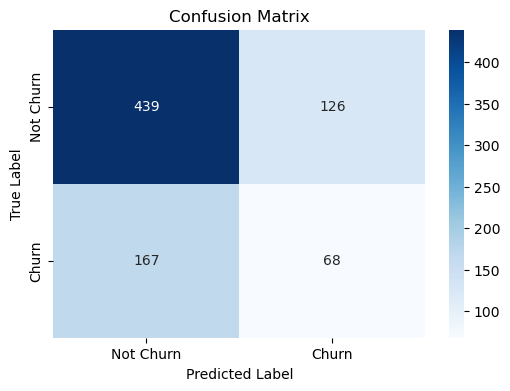

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = best_cat.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [51]:
import numpy as np
from sklearn.metrics import f1_score

# Get predicted probabilities for class 1 (Churn)
probs = best_cat.predict_proba(x_test)[:, 1]

# Try different thresholds from 0.30 to 0.70
thresholds = np.arange(0.30, 0.71, 0.01)
best_f1 = 0
best_threshold = 0.5

for t in thresholds:
    preds = (probs > t).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best F1 Score: {best_f1:.4f} at threshold: {best_threshold}")

Best F1 Score: 0.3978 at threshold: 0.3


Accuracy: 59.375
Precision: 35.19736842105263
Recall: 45.53191489361702
F1 Score: 0.3970315398886827


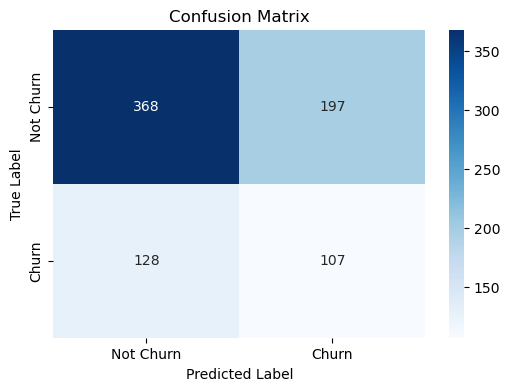

In [52]:
# Final prediction using best threshold
final_preds = (probs > 0.31).astype(int)

accuracy = accuracy_score(y_test, final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test, final_preds)
cm = confusion_matrix(y_test, final_preds)

print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1 Score:", f1)

# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churn', 'Churn'], 
            yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
test_df = pd.read_csv(r'D:\Ravin\ICBT\Bsc\CIS6005 ML\###Assignment###\Competition\test.csv')

In [ ]:
# Encode categorical features using the same mapping
test_df['Gender'] = test_df['Gender'].map({'Female': 0, 'Male': 1})
test_df['Location'] = test_df['Location'].map({
    "Illinois": 0, "California": 1, "Florida": 2, "New York": 3, "Texas": 4
})
test_df['Subscription_Type'] = test_df['Subscription_Type'].map({
    "Basic": 0, "Premium": 1, "Enterprise": 2
})
test_df['Last_Interaction_Type'] = test_df['Last_Interaction_Type'].map({
    "Neutral": 0, "Negative": 1, "Positive": 2
})

In [ ]:
# Drop the ID column to prepare the features
test_features = test_df.drop(['Customer_ID'], axis=1)

In [ ]:
print("Gender:", test_df['Gender'].unique())
print("Location:", test_df['Location'].unique())
print("Subscription_Type:", test_df['Subscription_Type'].unique())
print("Last_Interaction_Type:", test_df['Last_Interaction_Type'].unique())

In [ ]:
# Get predicted probabilities
test_probs = model_cat.predict_proba(test_features)[:, 1]

# Apply the best threshold from earlier
test_predictions = (test_probs >= 0.30).astype(int)

In [ ]:
submission = pd.DataFrame({
    'Customer_ID': test_df['Customer_ID'],
    'Churn': test_predictions
})

submission.to_csv('SubmissionLastCatLast0.csv', index=False)

In [ ]:
import pickle

# Save best model
with open('CATbest_model0.pkl', 'wb') as f:
    pickle.dump(best_cat, f)